# DKRZ Python visualization

## Warming stripes

----

```
Copyright 2022 Deutsches Klimarechenzentrum GmbH (DKRZ)
Licensed under CC-BY-NC-SA-4.0
```

----

Most of us have already come across Ed Hawkins' depiction of the 'Warming Stripes'. In this example we show how to create this plot with Python using the annual mean temperature data from the Deutscher Wetterdienst (DWD). 

The goal is to generate the Warming Stripes for a selected German state and additionally to draw the anomalies below the plot for a better understanding.

**Content**
- read all states CSV data files and concat them to a single Pandas DataFrame
- use Rectangle and PatchCollection to generate the warmin stripes plot
- define a function to compute the running mean
- compute the climatology and the anomalies
- use pyplot.bar to create the anomalies plot
- attach both plots into one figure

**Data**
- 12 datasets containing the 16 German states temperature anomalies from  <br> Deutscher Wetterdienst (German Weather Service), Climate Data Center (CDC)<br>
https://www.dwd.de/DE/leistungen/zeitreihen/zeitreihen.html  <br>

**Based on**
- Ed Hawkins' 'Temperature changes around the world (1901-2018)' https://showyourstripes.info/s/globe


<br>


In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap

## Input files

In [2]:
data_dir  = '../../data/DWD/'

input_files = ['Baden-Wuertenberg_Temperature_Anomaly_1881-2018_ym.txt', 
               'Bayern_Temperature_Anomaly_1881-2018_ym.txt', 
               'Berlin_Brandenburg_Temperature_Anomaly_1881-2018_ym.txt', 
               'Hamburg_Bremen_Niedersachsen_Temperature_Anomaly_1881-2018_ym.txt', 
               'Hessen_Temperature_Anomaly_1881-2018_ym.txt', 
               'Mecklenburg-Vorpommern_Temperature_Anomaly_1881-2018_ym.txt', 
               'Nordrhein-Westphalen_Temperature_Anomaly_1881-2018_ym.txt', 
               'Rheinland-Pfalz_Saarland_Temperature_Anomaly_1881-2018_ym.txt', 
               'Sachsen_Temperature_Anomaly_1881-2018_ym.txt', 
               'Sachsen-Anhalt_Temperature_Anomaly_1881-2018_ym.txt', 
               'Schleswig-Holstein_Temperature_Anomaly_1881-2018_ym.txt', 
               'Thueringen_Temperature_Anomaly_1881-2018_ym.txt']
input_files = [data_dir + f for f in input_files]

## Combine/concat data

1. read the state name which are not in the same order as their file names let us assume
1. read the data for each state
1. change the column name to the state name
1. concatenate the data
1. delete duplicated columns (Jahr)

Each state file has a header of 24 lines describing the data followed by a column containing the year (Jahr) and a second column with the data value. 

For example the state file for 'Hamburg, Bremen, Niedersachsen':

```
# Hamburg, Bremen, Niedersachsen
#
# Parameter Jahr Wert
# Minimum [°C]  1940    6.9
# Maximum [°C]  2014    10.8
# 
# 30-jähriger Mittelwert [°C]
# 1981-2010   9.3
# 1971-2000   9.0
# 1961-1990   8.6
# 
# aktueller Wert [°C]   2018    10.7
# 
# Abweichung vom Referenzzeitraum [K]
# 1981-2010   1.4
# 1971-2000   1.8
# 1961-1990   2.1
# 
# linearer Trend [K]    1881-2018       1.6
#
# aktuelle Platzierung (absteigend)     2018    2
# aktuelle Platzierung (aufsteigend)    2018    137
# 
# Gebietsmittel Jahr Wert
1881    7.5
1882    8.9
1883    8.4
...
```


In [3]:
for i,f in enumerate(input_files):
    name = os.popen("head -1 "+f+" | tr -d '# \n'").read()
    dfi = pd.read_csv(f, skiprows=range(0,23), usecols=['#', 'Gebietsmittel'], sep=' ')
    dfi.columns = ['Jahr', name]
    if i == 0:
        df_all = dfi
    else:
        df_all = pd.concat([df_all, dfi], axis=1, join='inner')
        df_all = df_all.loc[:,~df_all.columns.duplicated()]

The new dataframe **df_all**:

```
 	Jahr 	Baden-Wuerttemberg 	Bayern 	Brandenburg,Berlin 	Hamburg,Bremen,Niedersachsen 	Hessen 	Mecklenburg-Vorpommern 	Nordrhein-Westfalen 	Rheinland-Pfalz,Saarland 	Sachsen 	Sachsen-Anhalt 	Schleswig-Holstein 	Thueringen
0 	1881 	7.7 	6.6 	7.6 	7.5 	7.5 	7.0 	8.1 	8.0 	6.7 	7.5 	7.1 	7.5
1 	1882 	8.1 	7.3 	9.0 	8.9 	8.2 	8.5 	9.0 	8.6 	8.1 	8.8 	8.8 	8.8
2 	1883 	7.8 	6.8 	8.4 	8.4 	8.0 	7.9 	8.7 	8.3 	7.5 	8.3 	8.2 	8.3
3 	1884 	8.4 	7.5 	9.1 	9.1 	8.6 	8.7 	9.4 	9.0 	8.2 	8.9 	8.9 	8.9
4 	1885 	7.8 	7.0 	8.4 	7.9 	7.7 	7.7 	8.3 	8.0 	7.7 	8.1 	7.6 	8.1
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
133 	2014 	10.1 	9.6 	10.7 	10.8 	10.3 	10.2 	11.0 	10.7 	10.1 	10.7 	10.5 	10.7
134 	2015 	9.9 	9.4 	10.4 	10.2 	9.9 	9.8 	10.4 	10.3 	9.9 	10.3 	9.7 	10.3
135 	2016 	9.3 	8.9 	10.0 	9.9 	9.4 	9.6 	10.1 	9.8 	9.4 	10.1 	9.6 	10.1
136 	2017 	9.4 	8.8 	9.9 	10.0 	9.6 	9.5 	10.3 	10.0 	9.4 	10.0 	9.6 	10.0
137 	2018 	10.4 	9.9 	10.8 	10.7 	10.5 	10.2 	11.0 	10.9 	10.3 	10.9 	10.2 	10.9
```


## Time

Set the time range and the 30-years reference time for the climatology.

In [4]:
start_year = df_all.Jahr[0]
end_year = df_all.Jahr[df_all.Jahr.count()-1]

ref_years = [1981, 2010]

## Select state

Select the German state to be used, extract the data, and construct the plot file name.

Here, we choose the state set **'Hamburg,Bremen,Niedersachsen'** but its up to you to choose another one.

In [5]:
state = 'Hamburg,Bremen,Niedersachsen'

data = df_all.loc[:,state]

## Create the warming stripes plot

Create a colored rectangle for each year. Add a colorbar just to see the value range better.

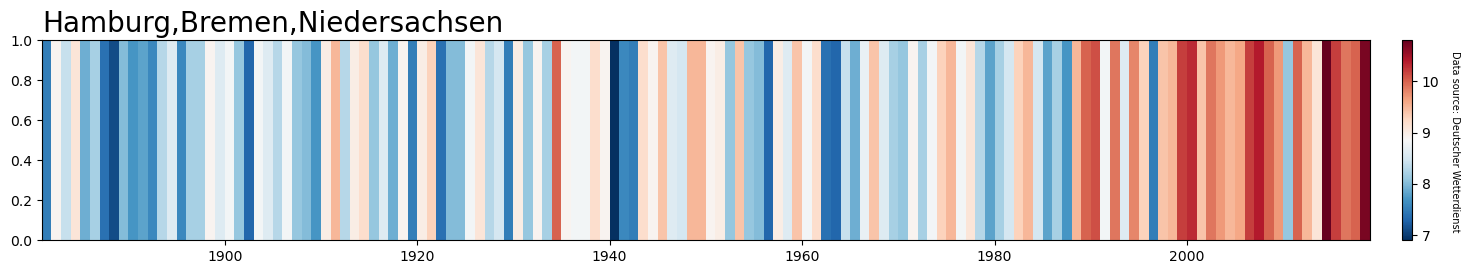

In [6]:
fig = plt.figure(figsize=(16, 2))

ax = fig.add_axes([0, 0, 1, 1])

cmap = 'RdBu_r'

rect_coll = PatchCollection([Rectangle((y, 0), 1, 1) for y in range(start_year, end_year + 1)])
rect_coll.set_array(data)
rect_coll.set_cmap(cmap)
ax.add_collection(rect_coll)

ax.set_ylim(0, 1)
ax.set_xlim(start_year, end_year + 1)
ax.set_title(state, fontsize=20, loc='left')

cbar = plt.colorbar(rect_coll, pad=0.02)

plt.figtext(0.88, 0.05, 'Data source: Deutscher Wetterdienst',
            rotation=270, fontsize=7)

plotfile1 = './plots/plot_'+state.replace(',', '_')+'_warming_stripes.png'
fig.savefig(plotfile1, bbox_inches='tight', facecolor='white')

## Function to calculate the running mean

The Savitzky-Golay filter uses convolution process applied on an array for
smoothing. The Python package scipy provide the function as shown in the
next example.


In [7]:
import scipy.signal

def calc_running_mean(data, window_length=30, polyorder=3, mode='nearest'):
    return scipy.signal.savgol_filter(data,
                                      window_length,
                                      polyorder,
                                      mode='nearest')

## Compute the climatology and anomalies

In [8]:
climatology = df_all.loc[(df_all['Jahr'] >= ref_years[0]) & 
                         (df_all['Jahr'] <= ref_years[1]), 
                         state].mean()

anomaly = data - climatology

## Create the anomaly plot


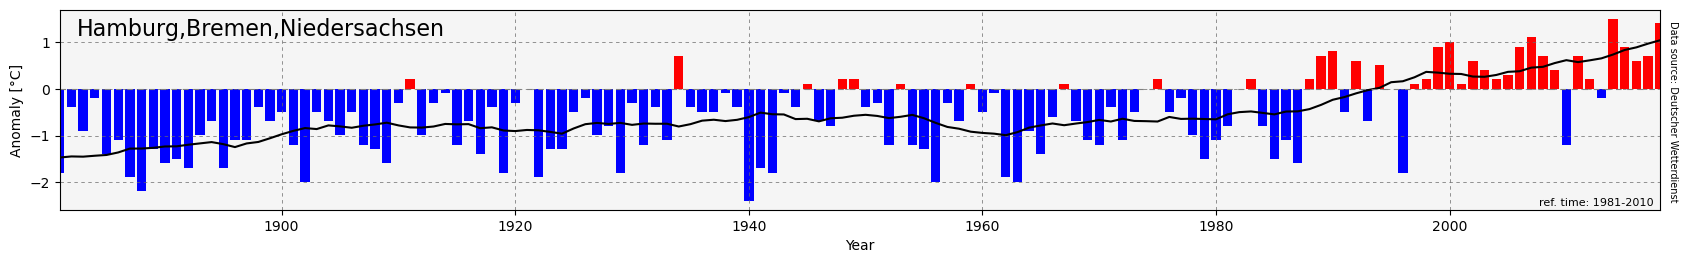

In [9]:
fig = plt.figure(figsize=(16, 2))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_facecolor('whitesmoke')

colors = ['red' if (value > 0) else 'blue' for value in anomaly]

xlabel = 'Year'
ylabel = 'Anomaly [°C]'
uppertitle = state
lowertitle = 'ref. time: 1981-2010'

ax.bar(df_all.Jahr, anomaly, color=colors)
ax.plot(df_all.Jahr, calc_running_mean(anomaly), 
        color='black', 
        linewidth=1.5)
plt.axhline(y=0., color='gray', linestyle=(0, (5, 5)), linewidth=0.8)

ax.grid(linestyle=(0, (5, 5)), linewidth=0.5, color='dimgray')
ax.set_xlim(start_year, end_year)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

tx1 = ax.text(xmin+1.5, ymax-(ymax-ymin)*0.04, 
              uppertitle, 
              fontsize=16, 
              ha='left', 
              va='top')
tx2 = ax.text(xmax-0.5, ymin+(ymax-ymin)*0.01, 
              lowertitle, 
              fontsize=8, 
              ha='right', 
              va='bottom')

source = plt.figtext(1.005, 0.05, 
            'Data source: Deutscher Wetterdienst',
            rotation=270, 
            fontsize=7)

## Create both plots

Attach the anomaly plot below the warming stripes plot.


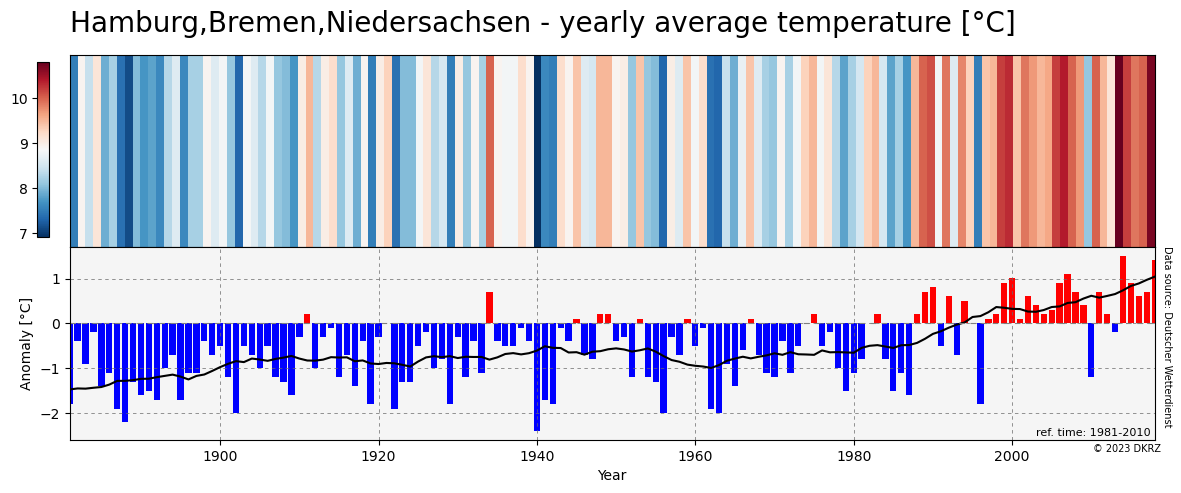

In [10]:
fig = plt.figure(figsize=(14, 5))

#-- define a 2 rows and 1 column grid (panel) for the subplots
gs = fig.add_gridspec(2,1, hspace=0)

#-- figure title
fig.suptitle(state+' - yearly average temperature [°C]', 
             x=0.125, 
             y=0.97, 
             ha='left', 
             fontsize=20)

#---- ax1
ax1 = fig.add_subplot(gs[0, 0])

rect_coll = PatchCollection([Rectangle((y, 0), 1, 1) for y in range(start_year, end_year + 1)])
rect_coll.set_array(data)
rect_coll.set_cmap(cmap)
ax1.add_collection(rect_coll)

ax1.set_ylim(0, 1)
ax1.set_xlim(start_year, end_year + 1)
ax1.yaxis.set_visible(False)

#---- ax 2
ax2 = fig.add_subplot(gs[1, 0])

xlabel = 'Year'
ylabel = 'Anomaly [°C]'
uppertitle = state
lowertitle = 'ref. time: 1981-2010'

colors = ['red' if (value > 0) else 'blue' for value in anomaly]

ax2.bar(df_all.Jahr, anomaly, color=colors)
ax2.plot(df_all.Jahr, calc_running_mean(anomaly), color='black', linewidth=1.5)
plt.axhline(y=0., color='gray', linestyle=(0, (5, 5)), linewidth=0.8)

ax2.set_facecolor('whitesmoke')
ax2.grid(linestyle=(0, (5, 5)), linewidth=0.5, color='dimgray')
ax2.set_xlim(start_year, end_year)
ax2.set_xlabel(xlabel)
ax2.set_ylabel(ylabel)

#-- attach text inside ax2 (anomaly plot)
xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()
tx2 = ax2.text(xmax-0.5, ymin+(ymax-ymin)*0.01, 
               lowertitle, 
               fontsize=8, 
               ha='right', 
               va='bottom')

#---- ax3
ax3 = fig.add_axes([0.102, 0.515, 0.008, 0.35])
cbar = plt.colorbar(rect_coll, cax=ax3, aspect=100)
ax3.yaxis.set_ticks_position('left')

#-- data source and copyright
plt.figtext(0.856, 0.087, '© 2023 DKRZ', fontsize=7)
plt.figtext(0.905, 0.14, 'Data source: Deutscher Wetterdienst',
            rotation=270, fontsize=7)

#-- save figure as PNG file
plotfile2 = './plots/plot_'+state.replace(',', '_')+'_warming_stripes_plus_anomaly_bars.png'
fig.savefig(plotfile2, bbox_inches='tight', facecolor='white')

## Another plot approach


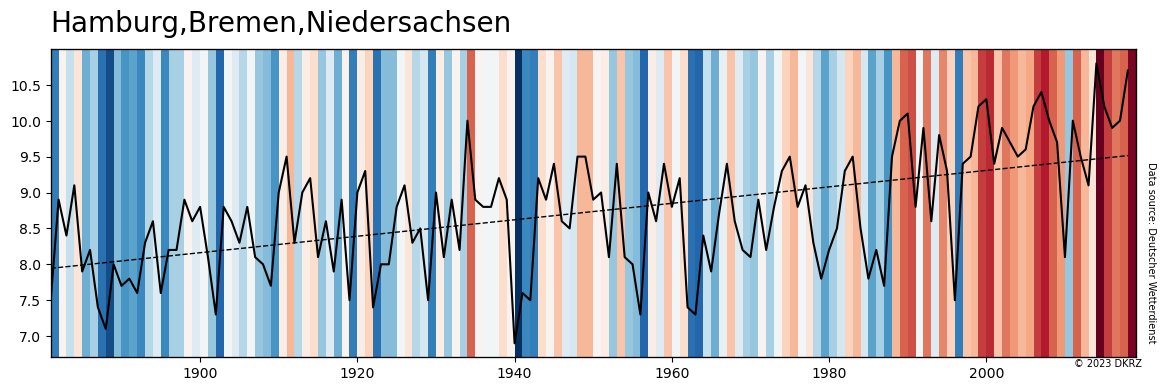

In [11]:
fig,ax = plt.subplots(figsize=(14, 4))

cmap = 'RdBu_r'

rect_coll = PatchCollection([Rectangle((y, 0), 1, 1) for y in range(start_year, end_year + 1)], zorder=2)
rect_coll.set_array(data)
rect_coll.set_cmap(cmap)
ax.add_collection(rect_coll)

ax.set_ylim(0, 1)
ax.set_xlim(start_year, end_year + 1)
ax.yaxis.set_visible(False)
ax.set_title(state, fontsize=20, loc='left', y=1.03)

ax2 = ax.twinx()
ax2.plot(df_all.Jahr, data, color='black', linewidth=1.5, )
ax2.yaxis.tick_left()

ax3 = ax2.twinx()
ax3.set_ylim(ax2.get_ylim())
ax3.yaxis.set_visible(False)

coef = np.polyfit(df_all.Jahr, data, 1)
trend = np.poly1d(coef) 

ax3.plot(df_all.Jahr, trend(df_all.Jahr), linestyle='--', color='black', linewidth=1, )

plt.figtext(0.856, 0.087, '© 2023 DKRZ', fontsize=7)
plt.figtext(0.907, 0.15, 'Data source: Deutscher Wetterdienst',
            rotation=270, fontsize=7)

plotfile3 = './plots/plot_'+state.replace(',', '_')+'_warming_stripes_plus_line.png'
fig.savefig(plotfile3, bbox_inches='tight', facecolor='white')